In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-movie-ratings/Amazon.csv
/kaggle/input/movies-recommendations-by-association-rules/__results__.html
/kaggle/input/movies-recommendations-by-association-rules/__notebook__.ipynb
/kaggle/input/movies-recommendations-by-association-rules/__output__.json
/kaggle/input/movies-recommendations-by-association-rules/custom.css
/kaggle/input/movies-recommendations-by-association-rules/__results___files/__results___67_0.png
/kaggle/input/movies-recommendations-by-association-rules/__results___files/__results___79_0.png
/kaggle/input/movies-recommendations-by-association-rules/__results___files/__results___66_0.png
/kaggle/input/movies-recommendations-by-association-rules/__results___files/__results___75_0.png
/kaggle/input/movies-recommendations-by-association-rules/ml-latest-small/movies.csv
/kaggle/input/movies-recommendations-by-association-rules/ml-latest-small/ratings.csv
/kaggle/input/movies-recommendations-by-association-rules/ml-latest-small/README.txt
/kaggle/input/m

Importing data 

In [2]:
review= pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [3]:
review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
rating=pd.read_csv('/kaggle/input/movies-recommendations-by-association-rules/ml-latest-small/ratings.csv')

In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Importing movies data.**

In [6]:
movies = pd.read_csv('/kaggle/input/movies-recommendations-by-association-rules/ml-latest-small/movies.csv')

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Importing ratings of those movies**

In [8]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Merging movies and it's rating on basis of movie id.**

In [9]:
merged= pd.merge(movies , rating , on='movieId')
merged.tail()


,movieId,title,genres,userId,rating,timestamp
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


**seeing the rows and columns in the dataset.**

In [10]:
merged.shape

(100836, 6)

**Changing timestamp into datetime format.**

In [11]:
import datetime
from datetime import datetime,date
merged['datetime'] = pd.to_datetime(merged['timestamp'])

In [12]:
merged.shape

(100836, 7)

**nunique gives the count of unique values(i.e. non repeated items)**

In [13]:
merged.nunique()

movieId       9724
title         9719
genres         951
userId         610
rating          10
timestamp    85043
datetime     85043
dtype: int64

In [14]:
merged.describe()

,movieId,userId,rating,timestamp,datetime
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100836
mean,19435.295718,326.127564,3.501557,1.205946e+09,1970-01-01 00:00:01.205946087
min,1.000000,1.000000,0.500000,8.281246e+08,1970-01-01 00:00:00.828124615
25%,1199.000000,177.000000,3.000000,1.019124e+09,1970-01-01 00:00:01.019123866
50%,2991.000000,325.000000,3.500000,1.186087e+09,1970-01-01 00:00:01.186086662
75%,8122.000000,477.000000,4.000000,1.435994e+09,1970-01-01 00:00:01.435994144
max,193609.000000,610.000000,5.000000,1.537799e+09,1970-01-01 00:00:01.537799250
std,35530.987199,182.618491,1.042529,2.162610e+08,NaN


**Grouping data on specific basis.**


**Getting means of reviews **

In [15]:
a=merged
a=a.groupby("title")["rating"].mean()
a

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [16]:
sorted = a.sort_values(ascending=False)
sorted

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

**Getting counts of reviews**

In [17]:
b=merged.groupby("title")["rating"].count()
b.head()

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: rating, dtype: int64

**Creating a new dataframe**

In [18]:
dataset = pd.DataFrame()
dataset["average ratings"]= a
dataset["review counts"]=b
dataset

,average ratings,review counts
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


**Data visualization**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Shows what the are columns **

In [20]:
dataset.columns

Index(['average ratings', 'review counts'], dtype='object')

**Histogram**

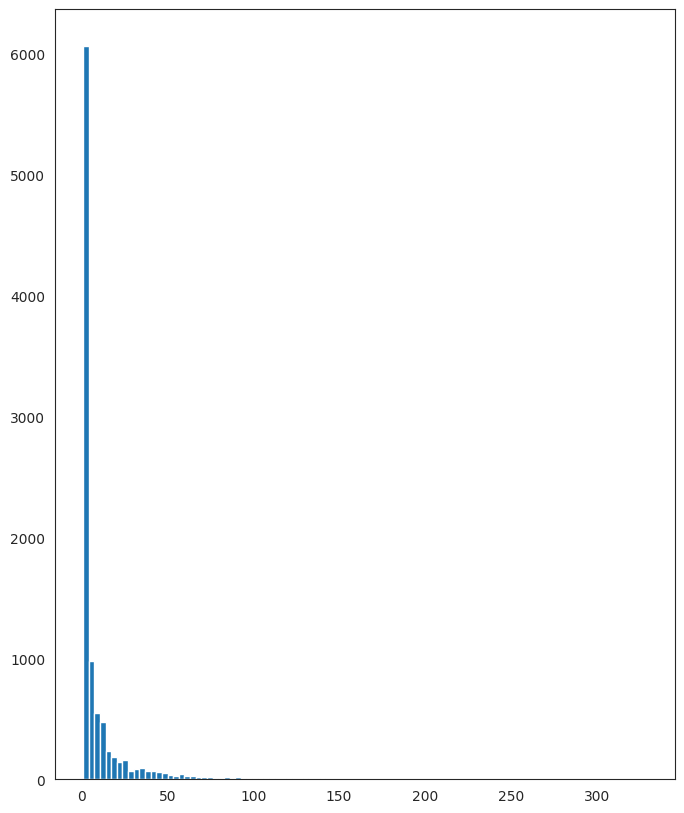

In [21]:
plt.figure(figsize=(8,10))
plt.hist(dataset['review counts'],bins=100)
plt.show()

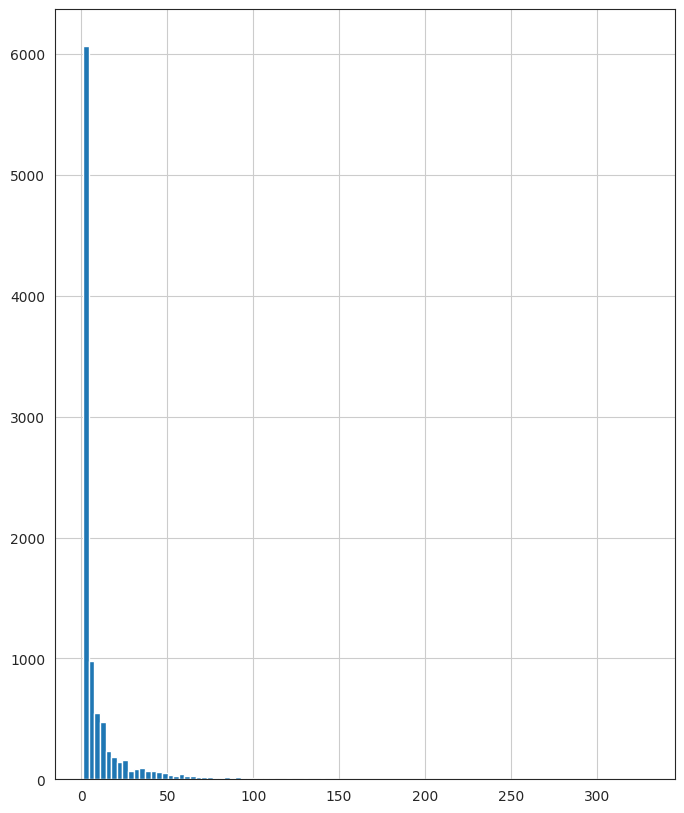

In [22]:
plt.figure(figsize=(8,10))
dataset['review counts'].hist(bins=100)
plt.show()

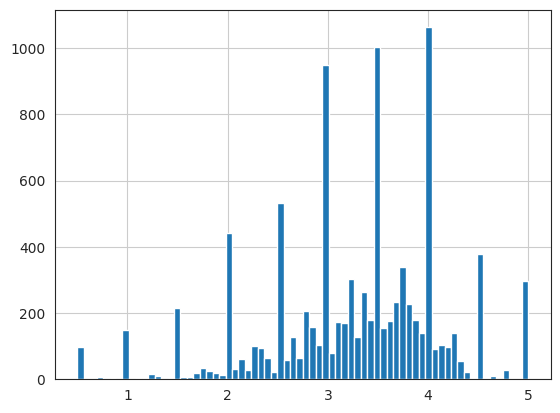

In [23]:
dataset['average ratings'].hist(bins=70)
plt.show()

**Joint plot of both rating and review count **

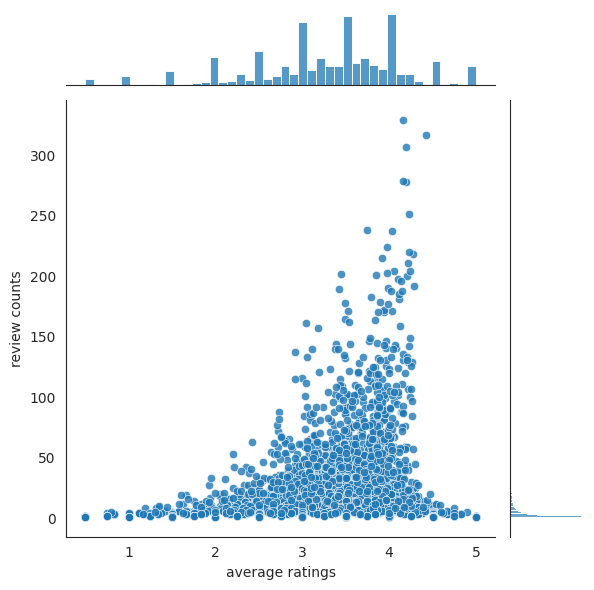

In [24]:
sns.jointplot(x="average ratings" , y="review counts" , data=dataset , alpha=0.8)

**Creating a matrix of these dataset .**

In [25]:
movie_matrix = merged.pivot_table(index="userId",columns="title",values="rating")
movie_matrix.head()
movie_matrix.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [26]:
x2 = movie_matrix['xXx (2002)']

In [27]:
x2.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

**Similar movies to xXx2 by calculating the correlation **

In [28]:
simi_x2 = movie_matrix.corrwith(x2)
simi_x2

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.762493
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.500000
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [29]:
#data= pd.get_dummies(merged)

In [30]:
print(merged.dtypes)

movieId               int64
title                object
genres               object
userId                int64
rating              float64
timestamp             int64
datetime     datetime64[ns]
dtype: object


**Droping the non-numeric datas**

In [31]:
data= merged.drop(columns = ['title','genres','datetime'])

**Coorelation visualization**

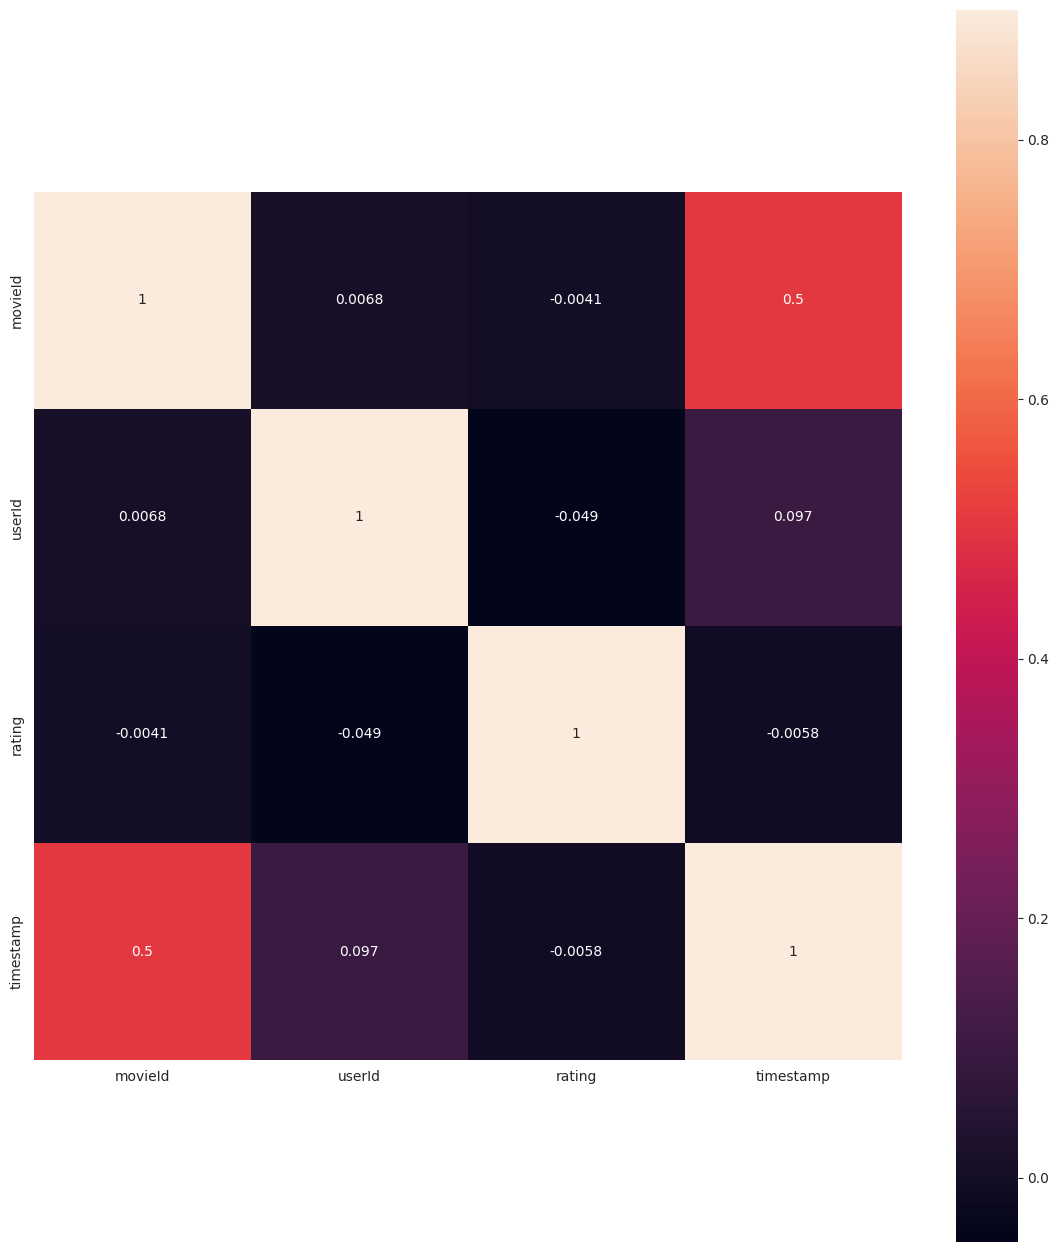

In [32]:
import matplotlib.pyplot as plt
cor = data.corr()
fig= plt.figure(figsize=(14,16))
sns.heatmap(cor , annot = True , vmax=.9 , square = True)
plt.show()

**The movies with more correlation will be recommended and so on , this shows the correlation of other movies with xXx2 (inplace = true, removes the null values)**

In [33]:
x2_corr = pd.DataFrame (simi_x2, columns = ['Correlation'])
x2_corr.dropna(inplace = True)
x2_corr.head()

,Correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325
